#Predictive model for Fraud

INDEX
* Import libraries
* Read CSV
* Exploratory Data Analysis
* Find NaNs and Fill NaNs
* 1.1 Plot an histogram of the balance amount for all the customers.
* 1.2 Report any structure you find and any hypotheses you have about that structure.
* 1.3 Report mean and median balance, grouped by year and month of activated_date.
* 2.1 Report in a table the following information for customers who activated their account and made their last payment during 2020: cust_id (excluding letters), activated_date (in format YYYY-MM), last_payment_date (in format YYYY-MM-DD), cash_advance , credit_limit , and a calculated field of cash_advance as a percentage of credit_limit.
* Predictive Model (3.1 Build a predictive model for fraud.)
* 3.2 What explanatory variable was the most powerful predictor for fraud?
* Conclusions

#**Import Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np

## Read CSV Stori Data Challenge 2021.csv

Read the dataframe that previously was save on Drive

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Stori Data Challenge 2021.csv", index_col=0)
df.shape

(8950, 21)

## EDA(Exploratory Data Analysis)

Make an exploratory data analysis for know the information that contain the dataset and visualize if you need to transform the data Type or contain NaNs.

In [ ]:
print(f'size of DataFrame:{df.shape}')
print(f'----------------------------------------------------------------------')
print(f'Information of DataFrame:{df.info()}')

size of DataFrame:(8950, 21)
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8950 entries, 1 to 8950
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   activated_date                    8937 non-null   object 
 2   last_payment_date                 8941 non-null   object 
 3   balance                           8948 non-null   float64
 4   balance_frequency                 8950 non-null   float64
 5   purchases                         8950 non-null   float64
 6   oneoff_purchases                  8950 non-null   float64
 7   installments_purchases            8950 non-null   float64
 8   cash_advance                      8838 non-null   float64
 9   purchases_frequency               8950 non-null   float64
 10  oneoff_purchases_frequency      

I visualize that "activated_date" and "last_payment_date" have a different dataType and this need to change for DateTime

### Find NaNs and Fill NaNs

In [ ]:
df.isna().sum(axis=0)

cust_id                               0
activated_date                       13
last_payment_date                     9
balance                               2
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                        112
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    321
prc_full_payment                      0
tenure                                0
fraud                                 0
dtype: int64

In [ ]:
new_df=df.fillna(0)
new_df

,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
1,C10001,2019-10-06,2020-09-09,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
2,C10002,2019-10-06,2020-07-04,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
3,C10003,2019-10-06,2020-09-17,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
4,C10004,2019-10-06,2020-08-24,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,0
5,C10005,2019-10-06,2020-10-20,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8946,C19186,2020-07-31,2020-11-03,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8947,C19187,2020-07-31,2020-09-06,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,0.000000,6,0
8948,C19188,2020-07-31,2020-06-03,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8949,C19189,2020-07-31,2020-07-19,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


Now the Dataset have 0 NaN


In [ ]:
new_df.isna().sum(axis=0)

cust_id                             0
activated_date                      0
last_payment_date                   0
balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
fraud                               0
dtype: int64

### **1.1 Plot an histogram of the balance amount for all the customers.**

Using the clean Dataset now I going to make a histogram for show the distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribucion de clientes')

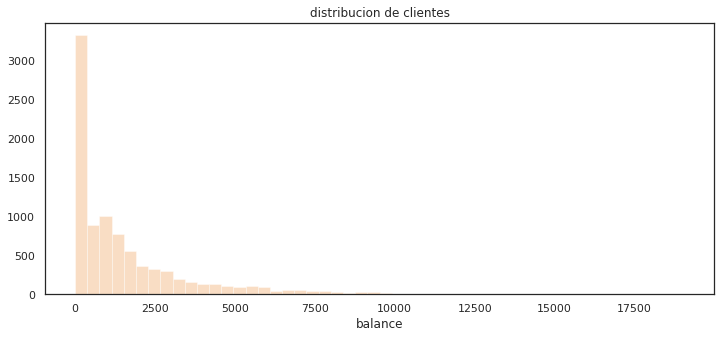

In [ ]:
sns.set(style="white")
plt.figure(figsize=(12,5))
sns.distplot(new_df["balance"], kde=False, norm_hist=False,color='#F2AB6D')
#pyplot.title('Histogram of balance distribution')
plt.title('distribucion de clientes')


### **1.2 Report any structure you find and any hypotheses you have about that structure.**

The majority of customers have a very low balance amount and there are a lot of outliers customers but this doesn't mean that there are a mistake or fraud

BOXPLOTS for show the outliers clients only for get a better view of the distribution of customers, I could clean the outliers for get better results with mean and median results but this isn't the objective of the analysis

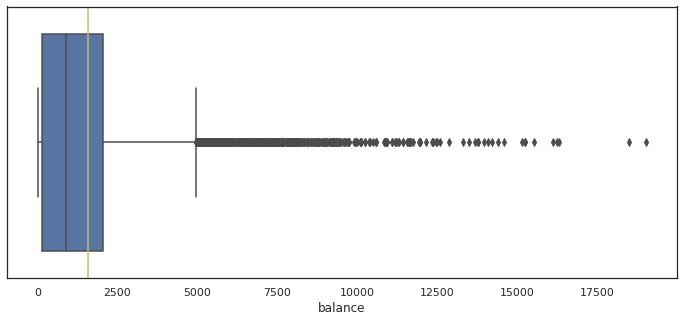

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df["balance"])
plt.axvline(df["balance"].mean(),c="y")

Modify the dataType of the columns activated_date and last_payment_date from the dataset

In [ ]:
new_df["activated_date"]=pd.to_datetime(new_df["activated_date"],format="%Y/%m/%d")
new_df["last_payment_date"]=pd.to_datetime(new_df["last_payment_date"],format="%Y/%m/%d")
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8950 entries, 1 to 8950
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   cust_id                           8950 non-null   object        
 1   activated_date                    8950 non-null   datetime64[ns]
 2   last_payment_date                 8950 non-null   datetime64[ns]
 3   balance                           8950 non-null   float64       
 4   balance_frequency                 8950 non-null   float64       
 5   purchases                         8950 non-null   float64       
 6   oneoff_purchases                  8950 non-null   float64       
 7   installments_purchases            8950 non-null   float64       
 8   cash_advance                      8950 non-null   float64       
 9   purchases_frequency               8950 non-null   float64       
 10  oneoff_purchases_frequency        8950 non-null 

### **1.3 Report mean and median balance, grouped by year and month of activated_date.**

Making a filters, rename columns and drop columns for make two new tables of "mean" and "median".

In [ ]:
new_df_filter_mean=new_df.groupby(pd.PeriodIndex(new_df["activated_date"],freq="M"),axis=0).mean()
mean=new_df_filter_mean.rename(columns={"balance":"mean"})
mean.drop(columns=["balance_frequency","purchases","oneoff_purchases","installments_purchases","cash_advance","purchases_frequency","oneoff_purchases_frequency","purchases_installments_frequency","cash_advance_frequency","cash_advance_trx","purchases_trx","credit_limit","payments","minimum_payments","prc_full_payment","tenure","fraud"])

,mean
activated_date,
1970-01,1170.314801
2019-10,2482.234166
2019-11,1848.704323
2019-12,2016.460429
2020-01,1852.447448
2020-02,1747.350977
2020-03,1554.973023
2020-04,1483.183191
2020-05,1214.333732


In [ ]:
new_df_filter_median=new_df.groupby(pd.PeriodIndex(new_df["activated_date"],freq="M"),axis=0).median()
median=new_df_filter_median.rename(columns={"balance":"median"})
median.drop(columns=["balance_frequency","purchases","oneoff_purchases","installments_purchases","cash_advance","purchases_frequency","oneoff_purchases_frequency","purchases_installments_frequency","cash_advance_frequency","cash_advance_trx","purchases_trx","credit_limit","payments","minimum_payments","prc_full_payment","tenure","fraud"])


,median
activated_date,
1970-01,967.177679
2019-10,1524.409377
2019-11,1082.071173
2019-12,1158.676210
2020-01,1174.706384
2020-02,994.841733
2020-03,828.954823
2020-04,910.141912
2020-05,734.557681


*** 1.3-RESULT ***

Create a new Dataframe for combination both results in one table

In [ ]:
#Group both dataframes and get the resultant table
df_month_year=pd.DataFrame([mean["mean"],median["median"]])
df_month_year.head()

activated_date,1970-01,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07
mean,1170.314801,2482.234166,1848.704323,2016.460429,1852.447448,1747.350977,1554.973023,1483.183191,1214.333732,939.997996,649.717622
median,967.177679,1524.409377,1082.071173,1158.676210,1174.706384,994.841733,828.954823,910.141912,734.557681,472.791862,221.291290


### **2.1 Report in a table the following information for customers who activated their account and made their last payment during 2020: cust_id (excluding letters), activated_date (in format YYYY-MM), last_payment_date (in format YYYY-MM-DD), cash_advance , credit_limit , and a calculated field of cash_advance as a percentage of credit_limit.**

Evaluate all values:If the value==0 then Percentage=100 else (cash_advance*100)/credit_limit
And create a new column "Percentage" for show the Percentage of credit that the customers have.

In [ ]:
operation=new_df.loc[1,"cash_advance"]
for i in range(1,len(new_df)+1):
  if new_df.loc[i,"cash_advance"] !=0:
    new_df.loc[i,"Percentage"]=(100-((new_df.loc[i,"cash_advance"]*100)/new_df.loc[i,"credit_limit"]))
    operation=new_df.loc[i,"cash_advance"]
  else:
    new_df.loc[i,"Percentage"]=100
print(new_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


     cust_id activated_date last_payment_date  ...  tenure  fraud  Percentage
1     C10001     2019-10-06        2020-09-09  ...      12      0  100.000000
2     C10002     2019-10-06        2020-07-04  ...      12      0    7.957922
3     C10003     2019-10-06        2020-09-17  ...      12      0  100.000000
4     C10004     2019-10-06        2020-08-24  ...      12      0   97.256160
5     C10005     2019-10-06        2020-10-20  ...      12      0  100.000000
...      ...            ...               ...  ...     ...    ...         ...
8946  C19186     2020-07-31        2020-11-03  ...       6      0  100.000000
8947  C19187     2020-07-31        2020-09-06  ...       6      0  100.000000
8948  C19188     2020-07-31        2020-06-03  ...       6      0  100.000000
8949  C19189     2020-07-31        2020-07-19  ...       6      0   92.688244
8950  C19190     2020-07-31        2020-10-14  ...       6      0   89.413333

[8950 rows x 22 columns]


Drop the letter C from column "cust_id"

In [ ]:
new_df_table=pd.DataFrame([],[new_df["cust_id"].str.replace("C","").astype(int),new_df["activated_date"],new_df["last_payment_date"],new_df["cash_advance"],new_df["credit_limit"],new_df["Percentage"]])
new_df_table

,,,,,
cust_id,activated_date,last_payment_date,cash_advance,credit_limit,Percentage
10001,2019-10-06,2020-09-09,0.000000,1000.0,100.000000
10002,2019-10-06,2020-07-04,6442.945483,7000.0,7.957922
10003,2019-10-06,2020-09-17,0.000000,7500.0,100.000000
10004,2019-10-06,2020-08-24,205.788017,7500.0,97.256160
10005,2019-10-06,2020-10-20,0.000000,1200.0,100.000000
...,...,...,...,...,...
19186,2020-07-31,2020-11-03,0.000000,1000.0,100.000000
19187,2020-07-31,2020-09-06,0.000000,1000.0,100.000000
19188,2020-07-31,2020-06-03,0.000000,1000.0,100.000000


***2.1 RESULT***

Show a filtered dataframe with range users that have an active date in 2020 and the last payment date where in 2020

In [ ]:
filtered_df=new_df_table.query("activated_date>= '2020-02-01' and activated_date<='2020-12-31' and last_payment_date>='2020-02-01' and last_payment_date<='2020-12-31'")
filtered_df

,,,,,
cust_id,activated_date,last_payment_date,cash_advance,credit_limit,Percentage
13622,2020-02-01,2020-11-01,0.000000,10500.0,100.000000
13623,2020-02-01,2020-10-26,75.783817,1500.0,94.947746
13624,2020-02-01,2020-04-25,0.000000,4500.0,100.000000
13625,2020-02-01,2020-10-12,0.000000,6000.0,100.000000
13626,2020-02-01,2020-06-15,344.256221,2500.0,86.229751
...,...,...,...,...,...
19186,2020-07-31,2020-11-03,0.000000,1000.0,100.000000
19187,2020-07-31,2020-09-06,0.000000,1000.0,100.000000
19188,2020-07-31,2020-06-03,0.000000,1000.0,100.000000


# Predictive Model

***3.1 Build a predictive model for fraud.***

Assign the dataframe to a new variable and drop the letter C from "cust_id" and drop unnecessary columns for make a predictive model and comprovate with different ways that the dataframe doesn't have errors

In [ ]:
clean_df=new_df

In [ ]:
clean_df["cust_id"]=clean_df["cust_id"].str.replace("C","").astype(int)
clean_df

,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud,Percentage
1,10001,2019-10-06,2020-09-09,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0,100.000000
2,10002,2019-10-06,2020-07-04,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,7.957922
3,10003,2019-10-06,2020-09-17,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0,100.000000
4,10004,2019-10-06,2020-08-24,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,0,97.256160
5,10005,2019-10-06,2020-10-20,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8946,19186,2020-07-31,2020-11-03,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0,100.000000
8947,19187,2020-07-31,2020-09-06,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,0.000000,6,0,100.000000
8948,19188,2020-07-31,2020-06-03,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0,100.000000
8949,19189,2020-07-31,2020-07-19,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0,92.688244


In [ ]:
#remove unnecessary columns
clean_df=clean_df.drop(columns=["activated_date","last_payment_date","cust_id","Percentage"])

In [ ]:
#Clean null information from dataset
clean_df =clean_df[~clean_df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [ ]:
clean_df.shape[0]

8950

In [ ]:
clean_df.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
1,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
2,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
3,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
4,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,0
5,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [ ]:
clean_df.isnull().any()

balance                             False
balance_frequency                   False
purchases                           False
oneoff_purchases                    False
installments_purchases              False
cash_advance                        False
purchases_frequency                 False
oneoff_purchases_frequency          False
purchases_installments_frequency    False
cash_advance_frequency              False
cash_advance_trx                    False
purchases_trx                       False
credit_limit                        False
payments                            False
minimum_payments                    False
prc_full_payment                    False
tenure                              False
fraud                               False
dtype: bool

In [ ]:
clean_df.isna().sum(axis=0)

balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
fraud                               0
dtype: int64

In [ ]:
clean_df.isnull().sum().sort_values(ascending=False)/len(clean_df)

fraud                               0.0
tenure                              0.0
balance_frequency                   0.0
purchases                           0.0
oneoff_purchases                    0.0
installments_purchases              0.0
cash_advance                        0.0
purchases_frequency                 0.0
oneoff_purchases_frequency          0.0
purchases_installments_frequency    0.0
cash_advance_frequency              0.0
cash_advance_trx                    0.0
purchases_trx                       0.0
credit_limit                        0.0
payments                            0.0
minimum_payments                    0.0
prc_full_payment                    0.0
balance                             0.0
dtype: float64

Now We are sure that there aren't any type of mistake or NaNs

###Supervised Logistic Regression

In [ ]:
X=clean_df.drop(columns=['fraud'])
y=clean_df['fraud']

In [ ]:
#Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
#assign variables of test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
#assign the model with max 2000 possible iteration
logreg=LogisticRegression(max_iter=2000)

Train the model

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [ ]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

The model have a currency of:

In [ ]:
logreg.score(X_test, y_test)

0.9970204841713222

Import libraries for make a confusion matrix

In [ ]:
from sklearn import metrics

Assign and call the confusion matrix for create a heatmap that show the results

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[2661,    1],
       [   7,   16]])

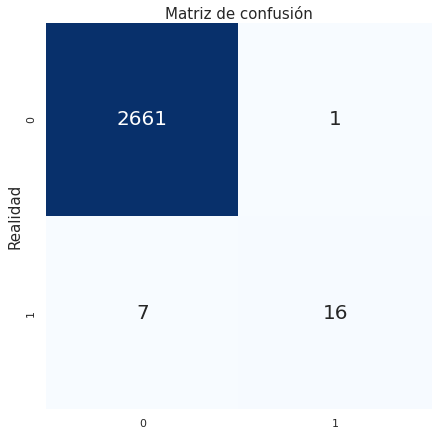

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Matriz de confusión', fontsize=15);

Prediction from categorical variable: fraud

True Positive

There are 2664 customers =0 and the model predict that are 0

True Negative

There are 13 customers =1 and the model predict that are 1

False Positive

There are 8  customers =1 and the model predict that are 0

False Negative

There are 0 customers =0 and the model predict that are 1

In [ ]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("precision:",metrics.precision_score(y_test, y_pred))
print("accuracy:",metrics.accuracy_score(y_test, y_pred))
print("sensitivity:",metrics.recall_score(y_test, y_pred))
print("specificity:", tn / (tn + fp))

precision: 0.9411764705882353
accuracy: 0.9970204841713222
sensitivity: 0.6956521739130435
specificity: 0.9996243425995492


3.2 What explanatory variable was the most powerful predictor for fraud?

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

Feature: 0, Score: 0.16320
Feature: 1, Score: -0.64301
Feature: 2, Score: 0.48497
Feature: 3, Score: -0.46190
Feature: 4, Score: 0.18432
Feature: 5, Score: -0.11978
Feature: 6, Score: -0.40602
Feature: 7, Score: 0.03772
Feature: 8, Score: -0.51785
Feature: 9, Score: 0.26540


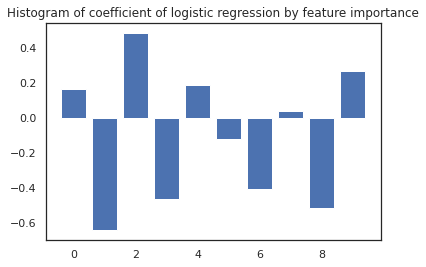

In [ ]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title("Histogram of coefficient of logistic regression by feature importance")
pyplot.show()

The most important feature for predict the fraud was the feature 1

### Conclusion
I Used a logistic regresion for make a model that going to predict the fraud in a dataset with a catgoric variable where I show to the model this values that represent: 1=True, 0=False and I began with the fit for the model where I put the 30% of the data for test and 70% for training after I used a confusion matrix for visualize the result of model.
